# Synthetic data generation- Comparison analysis

In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
from pathlib import Path
metrics_dir = 'metrics'

In [4]:
original_df_file = f'{metrics_dir}/original_df.csv'
if Path(original_df_file).is_file():
    original_df = pd.read_csv(original_df_file)
else:
    original_df = engine_data.sample(len(synthetic_df))
    original_df = original_df.reset_index(inplace=False,drop=True)
    original_df.to_csv(original_df_file, index=False,header=True) 


original_df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,34.9983,0.8400,100.0,449.44,555.78,1363.97,1125.39,5.48,8.00,194.72,...,182.94,2388.13,8073.91,9.3152,0.02,333,2223,100.00,14.72,8.8547
1,24.9984,0.6200,60.0,462.54,537.01,1256.09,1045.64,7.05,9.03,175.57,...,165.18,2028.40,7886.30,10.9136,0.02,306,1915,84.93,14.55,8.5935
2,42.0071,0.8401,100.0,445.00,549.81,1352.27,1124.99,3.91,5.71,138.57,...,130.77,2387.89,8080.70,9.3821,0.02,331,2212,100.00,10.62,6.4156
3,0.0020,0.0000,100.0,518.67,642.81,1589.90,1407.62,14.62,21.61,553.10,...,521.52,2388.13,8138.29,8.4215,0.03,393,2388,100.00,38.97,23.3654
4,9.9989,0.2517,100.0,489.05,604.29,1496.64,1304.30,10.52,15.49,393.91,...,371.99,2388.10,8139.17,8.6337,0.03,368,2319,100.00,28.62,17.0607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0075,0.2507,100.0,489.05,604.94,1499.84,1310.79,10.52,15.49,394.34,...,371.37,2388.16,8132.50,8.6452,0.03,369,2319,100.00,28.54,17.0885
96,35.0002,0.8404,100.0,449.44,555.52,1363.91,1129.15,5.48,8.00,195.68,...,183.46,2388.07,8066.44,9.2779,0.02,332,2223,100.00,14.87,8.9074
97,35.0048,0.8400,100.0,449.44,557.03,1376.97,1155.05,5.48,8.01,194.01,...,182.99,2389.65,8143.37,9.4200,0.02,338,2223,100.00,14.67,8.8234
98,10.0074,0.2517,100.0,489.05,604.93,1509.62,1315.22,10.52,15.49,394.45,...,371.01,2388.19,8152.99,8.6958,0.03,370,2319,100.00,28.68,17.1613


In [6]:
comp = {"gan":{},"vae":{},"bn":{},"bn_pgmpy":{},"gc":{},"ctgan":{}}
algos = []
for algo_name in comp.keys():
    synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'
    synthetic_df = pd.read_csv(synthetic_df_file)
    comp[algo_name]["df"] = synthetic_df
    real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
    comp[algo_name]["synthetic_stats_df"] = synthetic_stats_df
    comp[algo_name]["comparison_stats_df"] = comparison_stats_df

In [10]:
import pandas as pd

def compare_stats_across_algorithms(comp):
    # Create an empty DataFrame to store the comparison stats
    comparison_stats_df = pd.DataFrame(columns=["Algorithm", "KLD Mean", "WD Mean"])

    # Get the column names from the synthetic stats DataFrames
    column_names = list(comp.values())[0]["synthetic_stats_df"].index

    # Create empty DataFrames to store the min, max, mean, std for each column
    stats_df = pd.DataFrame(index=column_names, columns=[])

    for algo_name in comp.keys():
        synthetic_stats_df = comp[algo_name]["synthetic_stats_df"]
        comparison_stats = comp[algo_name]["comparison_stats_df"]

        # Append the algorithm name and comparison stats to the comparison_stats_df
        comparison_stats_df = pd.concat([comparison_stats_df, pd.DataFrame({
            "Algorithm": [algo_name.upper()],
            "KLD Mean": comparison_stats["KLD Mean"],
            "WD Mean": comparison_stats["WD Mean"]
        })], ignore_index=True)

        # Append the min, max, mean, std stats for each column to the stats_df
        stats_df[f"{algo_name.upper()} Min"] = synthetic_stats_df["Min"]
        stats_df[f"{algo_name.upper()} Max"] = synthetic_stats_df["Max"]
        stats_df[f"{algo_name.upper()} Mean"] = synthetic_stats_df["Mean"]
        stats_df[f"{algo_name.upper()} Std"] = synthetic_stats_df["Std"]

    return stats_df, comparison_stats_df

# Assuming you have already computed the stats and stored them in the 'comp' dictionary

stats_df, comparison_stats_df = compare_stats_across_algorithms(comp)

df_file = f'{metrics_dir}/stats_df.csv'
stats_df.to_csv(df_file, index=False,header=True) 

df_file = f'{metrics_dir}/real_stats_df.csv'
real_stats_df.to_csv(df_file, index=False,header=True) 

df_file = f'{metrics_dir}/comparison_stats_df.csv'
comparison_stats_df.to_csv(df_file, index=False,header=True) 

print("Original Statistics:")
display(real_stats_df)
print("Statistics across algorithms:")
display(stats_df)
print("\nComparison stats across algorithms:")
display(comparison_stats_df)





Original Statistics:


/tmp/ipykernel_44949/2148399687.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_stats_df = pd.concat([comparison_stats_df, pd.DataFrame({


,Min,Max,Mean,Std
setting1,0.0000,42.0080,21.863409,14.095098
setting2,0.0000,0.8419,0.539277,0.307351
setting3,60.0000,100.0000,94.800000,13.452137
s1,445.0000,518.6700,476.265200,25.222571
s2,536.3100,643.2700,584.522100,36.014661
s3,1247.0600,1597.7700,1433.442300,102.663913
s4,1040.5100,1418.2100,1220.112700,115.103377
s5,3.9100,14.6200,8.486500,3.421230
s6,5.7100,21.6100,12.294100,5.165116
s7,137.9500,555.4200,301.459000,139.818840


Statistics across algorithms:


,GAN Min,GAN Max,GAN Mean,GAN Std,VAE Min,VAE Max,VAE Mean,VAE Std,BN Min,BN Max,...,BN_PGMPY Mean,BN_PGMPY Std,GC Min,GC Max,GC Mean,GC Std,CTGAN Min,CTGAN Max,CTGAN Mean,CTGAN Std
setting1,-1517.07740,27.360790,-481.490512,222.666466,23.236387,26.458408,24.815204,0.681082,-3.021688,55.977707,...,22.022747,14.665361,0.1376,41.9496,19.447080,13.632633,0.0000,42.0080,23.556849,12.903639
setting2,-1408.50890,463.603330,-24.141536,276.730243,0.206421,1.052213,0.629765,0.191207,-0.033752,1.397931,...,0.544783,0.308938,0.0002,0.8420,0.521592,0.307358,0.0000,0.8420,0.573948,0.283755
setting3,-1475.65440,-166.946580,-558.689369,229.673419,93.552124,106.206055,99.524905,2.554512,60.899010,128.825270,...,93.200000,15.025312,60.0000,100.0000,96.000000,12.000000,60.0000,100.0000,87.600000,18.499730
s1,-686.91890,949.851000,501.157962,247.654866,440.535200,499.569760,468.509292,11.693381,474.811500,499.673580,...,479.435200,25.722438,445.0000,517.7900,473.809500,23.579005,445.0000,518.6700,471.777200,24.412754
s2,-1121.67900,1045.611300,587.130172,316.954111,534.477000,606.644800,568.874118,14.228405,498.143250,529.647500,...,585.899300,38.382291,535.9000,643.8200,581.819800,38.909755,535.9000,644.1300,572.055100,37.659809
s3,915.23890,1774.957600,1439.561863,166.827549,1314.666600,1493.002000,1399.899150,34.961542,1092.321000,1158.431600,...,1403.191700,106.332400,1245.8100,1607.0600,1438.770100,106.924448,1256.6400,1599.5800,1392.436300,114.116443
s4,465.76697,1263.566800,960.006547,144.406756,1094.075900,1241.671300,1164.201217,29.106442,929.107600,1005.550500,...,1239.465000,129.803251,1032.9200,1435.3200,1237.368700,130.004142,1039.5600,1415.1800,1177.638000,127.909980
s5,-1481.28500,117.647290,-230.382201,248.104112,6.456122,7.962306,7.127294,0.293681,10.716469,13.041504,...,8.808500,3.447726,5.4900,14.6200,9.374600,2.877356,3.9100,14.6200,7.868200,3.144132
s6,-1305.24100,385.837860,-132.323937,239.275696,8.246767,9.774734,9.143663,0.347193,12.397184,16.570883,...,12.670500,5.300964,5.7100,21.6100,11.297600,4.839442,5.7100,21.6100,11.373900,5.034544
s7,-1093.36400,443.655850,11.055311,219.983741,184.649810,209.654270,196.656915,4.954796,210.934200,298.101930,...,298.640800,151.538922,136.9900,551.7100,296.136000,135.738374,136.9900,555.5600,267.192200,136.215288



Comparison stats across algorithms:


,Algorithm,KLD Mean,WD Mean
0,GAN,130.040285,257.602429
1,VAE,0.301497,38.203530
2,BN,0.395654,196.681908
3,BN_PGMPY,0.842807,12.196494
4,GC,3.842384,18.005557
5,CTGAN,0.199364,22.397524


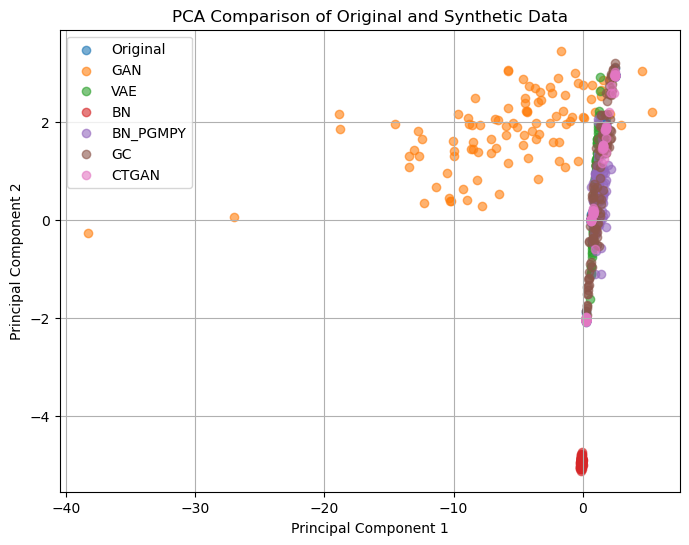

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca_comparison(original_df, comp):
    # Concatenate the original data and synthetic data from all algorithms
    data_frames = [original_df] + [comp[algo_name]["df"] for algo_name in comp.keys()]
    combined_df = pd.concat(data_frames, axis=0)
    
    # Perform PCA
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_df)
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)
    
    # Create a DataFrame with PCA coordinates and labels
    pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    labels = ['Original'] * len(original_df)
    for algo_name in comp.keys():
        labels += [algo_name.upper()] * len(comp[algo_name]["df"])
    pca_df['Label'] = labels
    
    # Plot the PCA distributions
    plt.figure(figsize=(8, 6))
    for label in pca_df['Label'].unique():
        data = pca_df[pca_df['Label'] == label]
        plt.scatter(data['PC1'], data['PC2'], alpha=0.6, label=label)
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Comparison of Original and Synthetic Data')
    plt.legend()
    plt.grid(True)
    file_name = file_name = f'{metrics_dir}/pca-comparison.png'
    plt.savefig(file_name)
    plt.show()


plot_pca_comparison(original_df, comp)

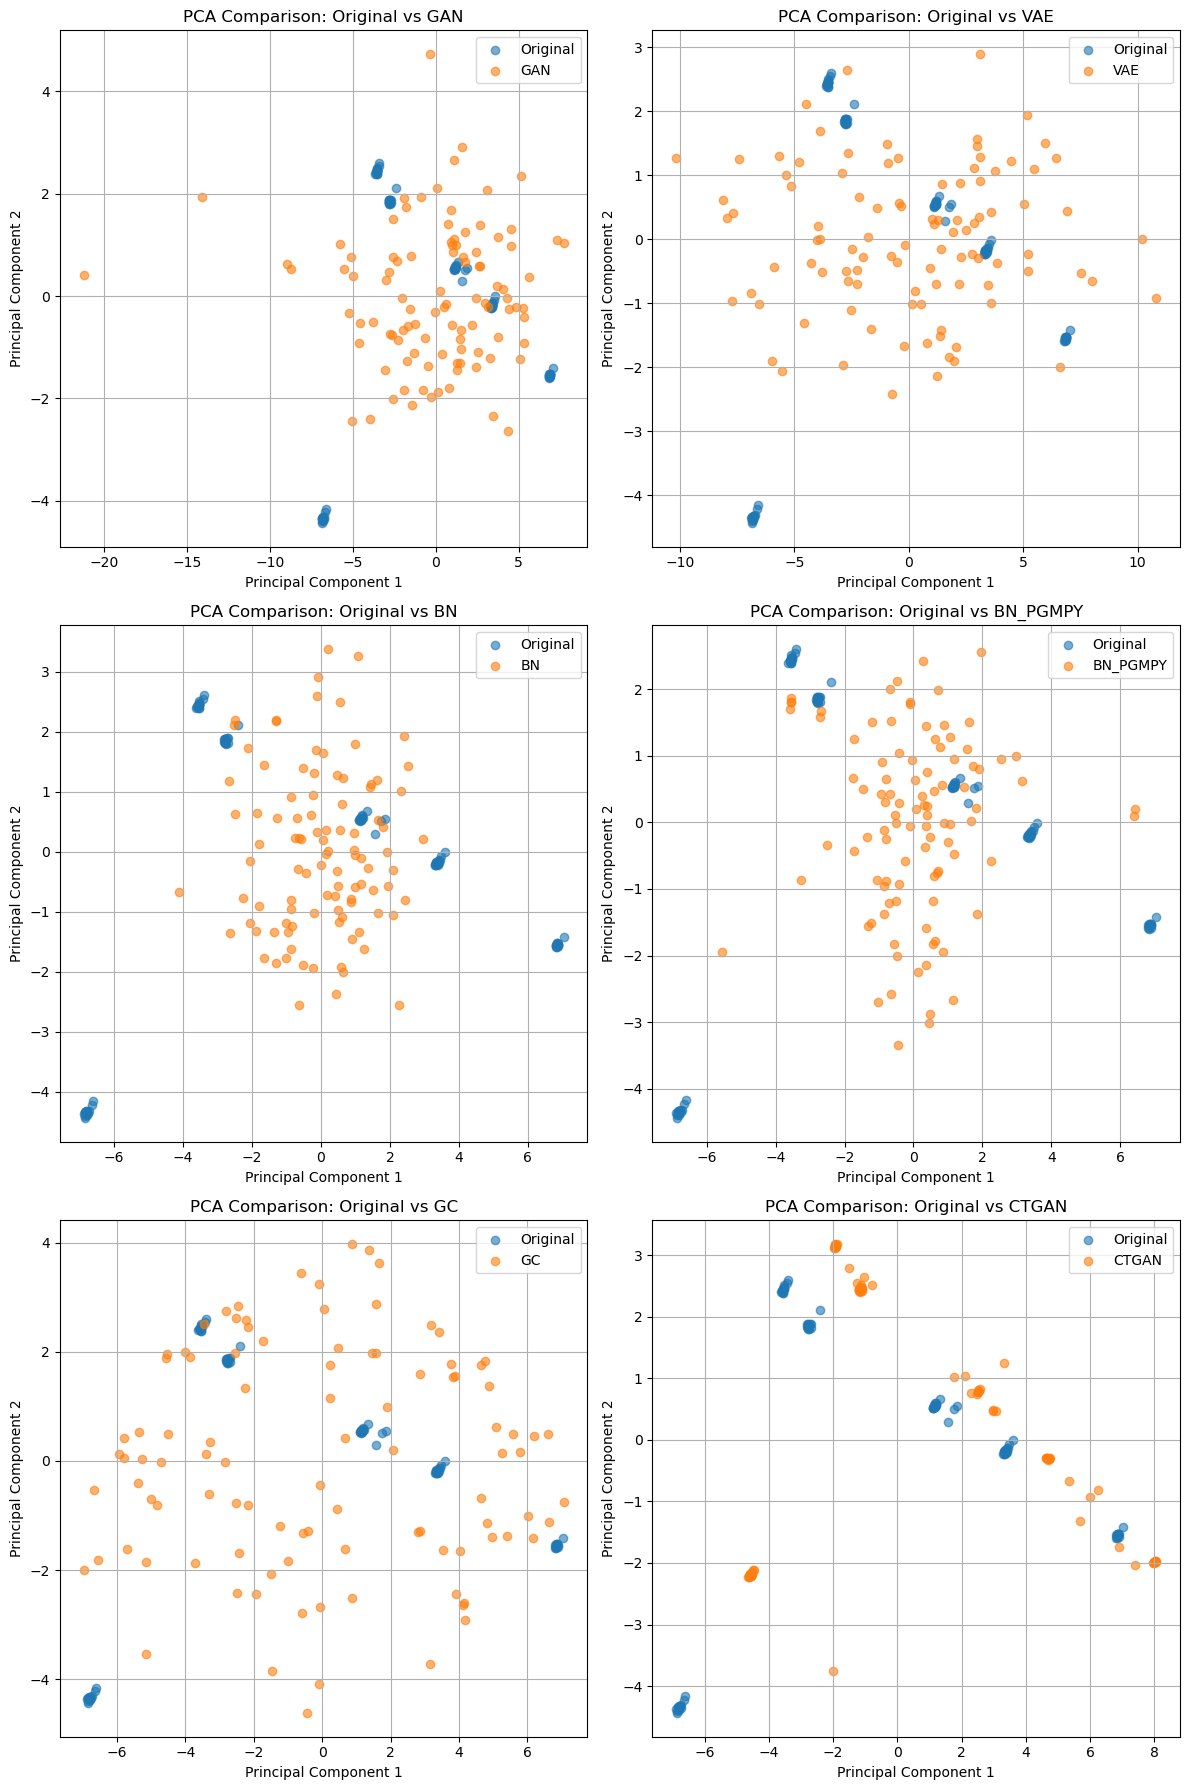

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca_comparison_multi(original_df, comp):
    num_plots = len(comp)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    # Perform PCA on original data
    scaler = StandardScaler()
    scaled_original_data = scaler.fit_transform(original_df)
    pca = PCA(n_components=2)
    pca_original_data = pca.fit_transform(scaled_original_data)
    pca_original_df = pd.DataFrame(data=pca_original_data, columns=['PC1', 'PC2'])
    pca_original_df['Label'] = 'Original'

    # Plot synthetic data for each algorithm along with original data
    for i, algo_name in enumerate(comp.keys()):
        synthetic_df = comp[algo_name]["df"]
        scaled_synthetic_data = scaler.fit_transform(synthetic_df)
        pca_synthetic_data = pca.fit_transform(scaled_synthetic_data)
        pca_synthetic_df = pd.DataFrame(data=pca_synthetic_data, columns=['PC1', 'PC2'])
        pca_synthetic_df['Label'] = algo_name.upper()

        ax = axes[i]
        ax.scatter(pca_original_df['PC1'], pca_original_df['PC2'], alpha=0.6, label='Original')
        ax.scatter(pca_synthetic_df['PC1'], pca_synthetic_df['PC2'], alpha=0.6, label=algo_name.upper())
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_title(f'PCA Comparison: Original vs {algo_name.upper()}')
        ax.legend()
        ax.grid(True)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    file_name = f'{metrics_dir}/pca-comparison-subplots-combined.png'
    plt.savefig(file_name)
    plt.show()

plot_pca_comparison_multi(original_df, comp)